In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True, ignore_index=True)
cat_feat = ['island', 'sex']

In [3]:
X = df.drop('species', axis=1)
y = df['species']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [5]:
train_dataset = catboost.Pool(X_train, y_train, cat_features=cat_feat)
test_dataset = catboost.Pool(X_test, y_test, cat_features=cat_feat)

In [24]:
params = {
    "n_estimators": 1500,
    "learning_rate": 0.03,
    "depth": 3,
    "use_best_model": True,
    "border_count": 64,
    "l2_leaf_reg": 1,
    "bagging_temperature": 2,
    "rsm": 0.5,
    "loss_function": "MultiClass", 
    "auto_class_weights" : 'Balanced',
    "random_state": 22,
    "custom_metric": ["Precision", "Recall", "F1"],
}

In [25]:
model_class = catboost.CatBoostClassifier(**params)

In [26]:
model_class.fit(train_dataset, eval_set=test_dataset)

0:	learn: 1.0535375	test: 1.0540225	best: 1.0540225 (0)	total: 154ms	remaining: 3m 50s
1:	learn: 1.0116727	test: 1.0124014	best: 1.0124014 (1)	total: 154ms	remaining: 1m 55s
2:	learn: 0.9804727	test: 0.9793336	best: 0.9793336 (2)	total: 159ms	remaining: 1m 19s
3:	learn: 0.9508195	test: 0.9533203	best: 0.9533203 (3)	total: 169ms	remaining: 1m 3s
4:	learn: 0.9318557	test: 0.9331781	best: 0.9331781 (4)	total: 174ms	remaining: 51.9s
5:	learn: 0.8957856	test: 0.8981081	best: 0.8981081 (5)	total: 174ms	remaining: 43.4s
6:	learn: 0.8689339	test: 0.8755205	best: 0.8755205 (6)	total: 181ms	remaining: 38.6s
7:	learn: 0.8418423	test: 0.8475380	best: 0.8475380 (7)	total: 185ms	remaining: 34.5s
8:	learn: 0.8146557	test: 0.8206757	best: 0.8206757 (8)	total: 192ms	remaining: 31.8s
9:	learn: 0.7853607	test: 0.7893468	best: 0.7893468 (9)	total: 202ms	remaining: 30s
10:	learn: 0.7658483	test: 0.7696436	best: 0.7696436 (10)	total: 209ms	remaining: 28.3s
11:	learn: 0.7388353	test: 0.7434693	best: 0.743469

In [27]:
def plot_imp(imp, tab):
    data = sorted([[imp[i], tab[i]] for i in range(len(imp))], key=lambda x: x[0], reverse=True)
    imp = [i[0] for i in data]
    tab = [i[1] for i in data]
    sns.barplot(x=imp, y=tab)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

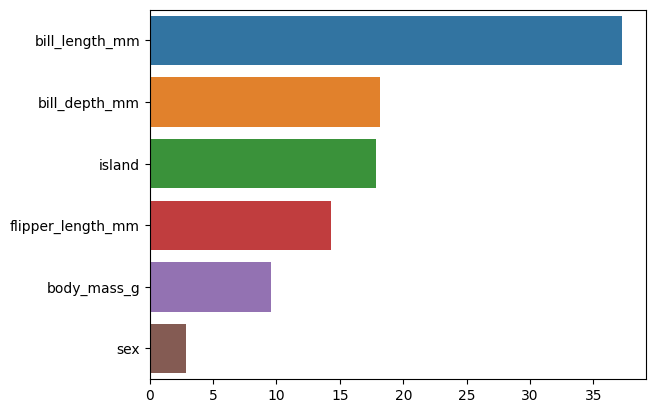

In [28]:
plot_imp(model_class.feature_importances_, X.columns)

https://github.com/a-milenkin/Competitive_Data_Science/blob/main/notebooks/4.1%20-%20CatBoost.ipynb